In [678]:
#library imports

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

#classifiers
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

#mterics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
#scalers
from sklearn.preprocessing import StandardScaler , MinMaxScaler



from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# Data Reading And Preprocessing 

In [679]:
df = pd.read_csv("Dataset.txt")

In [680]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,occurance
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [681]:
df.isnull().sum() # no null values

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [682]:
df['protocol_type'] = df['protocol_type'].replace("tcp" ,0)  # encoding
df['protocol_type'] = df['protocol_type'].replace("udp" , 1)  #  encoding
df['protocol_type'] = df['protocol_type'].replace("icmp",2)  # encoding
df['protocol_type'].unique()


array([0, 1, 2], dtype=int64)

In [683]:
for i in range(len(df['service'].unique())):  # converitng string to numeric
    df['service'] = df['service'].replace(df['service'].unique()[i] ,i) 

In [684]:
df['service'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69], dtype=int64)

In [685]:
for i in range(len(df['flag'].unique())):  # converitng string to numeric
    df['flag'] = df['flag'].replace(df['flag'].unique()[i] ,i+100) 

In [686]:
df['flag'].unique()

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110], dtype=int64)

Reading the Atack_type file for mapping

In [687]:
label = pd.read_csv('Attack_types.txt')  # target class

In [688]:
label = pd.DataFrame(label.values , columns = ["attack_type"])

In [689]:
len(label['attack_type'].unique())

40

In [690]:
df['attack_category'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [691]:
label['attack_type'].unique()

array(['apache2 dos', 'back dos', 'mailbomb dos', 'processtable dos',
       'snmpgetattack dos', 'teardrop dos', 'smurf dos', 'land dos',
       'neptune dos', 'pod dos', 'udpstorm dos', 'ps u2r',
       'buffer_overflow u2r', 'perl u2r', 'rootkit u2r', 'loadmodule u2r',
       'xterm u2r', 'sqlattack u2r', 'httptunnel u2r', 'ftp_write r2l',
       'guess_passwd r2l', 'snmpguess r2l', 'imap r2l', 'spy r2l',
       'warezclient r2l', 'warezmaster r2l', 'multihop r2l', 'phf r2l',
       'named r2l', 'sendmail r2l', 'xlock r2l', 'xsnoop r2l', 'worm r2l',
       'nmap probe', 'ipsweep probe', 'portsweep probe', 'satan probe',
       'mscan probe', 'saint probe', 'worm probe'], dtype=object)

## Mapping the attack types against categories

In [692]:
#dictionary for mapping of attack categories
cyber_attack_types = {'normal':'normal','neptune':'dos',
            'warezclient':'r21' , 'ipsweep':'probe' ,
          'teardrop':'dos' , 'portsweep':'probe' ,
                      'nmap':'probe' , 'satan':'probe' ,
                      'smurf':'dos' , 'pod':'dos' , 'back':'dos' ,
                      'guess_passwd':'r21' , 'ftp_write':'r21' ,
                      'multihop':'r21' , 'rootkit':'u2r' , 
                      'httptunnel':'u2r' ,'snmpguess':'r21' ,
                      'imap':'r21' , 'spy':'r21' , 'warezmaster':'r21' ,
                      'phf':'r21' , 'named':'r21' ,'sendmail':'r21' ,
                      'xlock':'r21' , 'xsnoop':'r21', 'worm':'r21',
                      'mscan':'probe' ,'saint':'probe' , 'worm' :'probe' ,
                      'buffer_overflow':'u2r' , 'loadmodule':'u2r',
                      'land':'dos' ,'perl':'u2r'
         }

In [693]:
df['target_label'] = df['attack_category'] # adding target label to the data frame

In [694]:
df['target_label'] = df['target_label'].map(cyber_attack_types) #mapping values in dataframe

In [695]:
df['target_label'].unique()  # total 5 unique classes

array(['normal', 'dos', 'r21', 'probe', 'u2r'], dtype=object)

In [696]:
#encoding the target labels
enc_labels = {
    'normal' : 0 ,
    'dos' : 1 ,
    'r21' : 2 ,
    'probe' : 3 ,
    'u2r' : 4
}

In [697]:
df['target_label'] = df['target_label'].map(enc_labels) # mapping the encoded labels

In [698]:
df['target_label'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [699]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,occurance,target_label
0,0,0,0,100,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0
1,0,1,1,100,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0
2,0,0,2,101,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
3,0,0,3,100,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
4,0,0,3,100,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,2,101,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,1
125969,8,1,2,100,105,145,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21,0
125970,0,0,15,100,2231,384,0,0,0,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,0
125971,0,0,35,101,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,1


## Scaling Features

In [700]:
scaler = StandardScaler()
df[['service','src_bytes','flag','dst_bytes','occurance']]=scaler.fit_transform(df[['service','src_bytes','flag','dst_bytes','occurance']])

# Correlation Analysis  For Feature Selection

In [701]:
correlation_matrix = df.corr()
corr_with_target = correlation_matrix['target_label']

sorted_features = corr_with_target.abs().sort_values(ascending=False)

print(sorted_features)


target_label                   1.000000
dst_host_srv_count             0.546923
logged_in                      0.538431
occurance                      0.532578
dst_host_diff_srv_rate         0.480732
dst_host_same_srv_rate         0.442043
dst_host_same_src_port_rate    0.403252
flag                           0.398071
same_srv_rate                  0.394552
dst_host_srv_rerror_rate       0.346545
srv_rerror_rate                0.345624
rerror_rate                    0.343777
diff_srv_rate                  0.332775
dst_host_srv_diff_host_rate    0.323976
dst_host_rerror_rate           0.321275
count                          0.301306
dst_host_srv_serror_rate       0.248342
serror_rate                    0.246354
dst_host_serror_rate           0.245892
protocol_type                  0.244467
srv_serror_rate                0.243075
duration                       0.170238
dst_host_count                 0.121911
service                        0.108303
srv_diff_host_rate             0.091470


## Selecting Top 7 features

In [702]:
features_and_target = ['dst_host_srv_count', 'logged_in', 'occurance', 
            'dst_host_diff_srv_rate' , 'dst_host_same_srv_rate' 
            ,'dst_host_same_src_port_rate','flag','target_label']

## Dropping unimportant features

In [703]:
df = df.drop(columns=[col for col in df.columns if col not in features_and_target])

df

,flag,logged_in,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,occurance,target_label
0,-0.606907,0,25,0.17,0.03,0.17,0.216426,0
1,-0.606907,0,1,0.00,0.60,0.88,-1.965556,0
2,0.368519,0,26,0.10,0.05,0.00,-0.219970,1
3,-0.606907,1,255,1.00,0.00,0.03,0.652823,0
4,-0.606907,1,255,1.00,0.00,0.00,0.652823,0
...,...,...,...,...,...,...,...,...
125968,0.368519,0,25,0.10,0.06,0.00,0.216426,1
125969,-0.606907,0,244,0.96,0.01,0.01,0.652823,0
125970,-0.606907,1,30,0.12,0.06,0.00,-0.656367,0
125971,0.368519,0,8,0.03,0.05,0.00,0.216426,1


In [704]:
features = ['dst_host_srv_count', 'logged_in', 'occurance', 
            'dst_host_diff_srv_rate' , 'dst_host_same_srv_rate' 
            ,'dst_host_same_src_port_rate','flag']  # separating features from target

In [705]:
df

,flag,logged_in,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,occurance,target_label
0,-0.606907,0,25,0.17,0.03,0.17,0.216426,0
1,-0.606907,0,1,0.00,0.60,0.88,-1.965556,0
2,0.368519,0,26,0.10,0.05,0.00,-0.219970,1
3,-0.606907,1,255,1.00,0.00,0.03,0.652823,0
4,-0.606907,1,255,1.00,0.00,0.00,0.652823,0
...,...,...,...,...,...,...,...,...
125968,0.368519,0,25,0.10,0.06,0.00,0.216426,1
125969,-0.606907,0,244,0.96,0.01,0.01,0.652823,0
125970,-0.606907,1,30,0.12,0.06,0.00,-0.656367,0
125971,0.368519,0,8,0.03,0.05,0.00,0.216426,1


# Splitting Data

In [706]:
X = df[features]  # features / attributes
y = df['target_label']   # target label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)   # splitting on data 70/30 ratio

# Decision Tree

In [707]:
Decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy' ,max_depth = 4 , random_state = 10 )

In [708]:
Decision_tree_classifier.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=10)

In [709]:
dct_prediction = Decision_tree_classifier.predict(X_test)

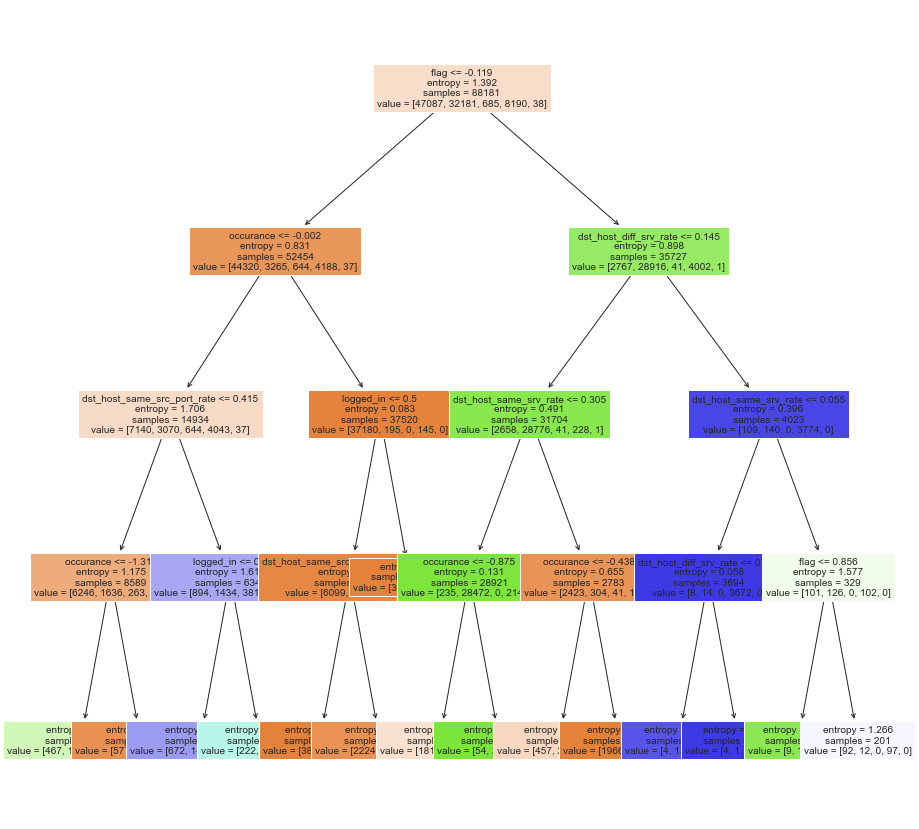

In [710]:
#decision Tree for entropy
plt.figure(figsize=(15, 15))

DTC_tree = tree.plot_tree(Decision_tree_classifier, filled=True, 
                          feature_names=features,
                          fontsize=10, )

## Metrics Score (Decision Tree)

In [711]:
Accuracy = accuracy_score(y_test, dct_prediction)
F1_score = f1_score(y_test, dct_prediction,average = 'weighted')
Recall_score = recall_score(y_test, dct_prediction,average = 'weighted')
Precision_score = precision_score(y_test, dct_prediction, average = 'weighted')

print("Accuracy score: ", Accuracy )
print("F1 score: ",F1_score)
print("Recall Score: ",Recall_score)
print("Precision score: ",Precision_score)

Accuracy score:  0.9400137595258256
F1 score:  0.9406491114246106
Recall Score:  0.9400137595258256
Precision score:  0.9425587802646751


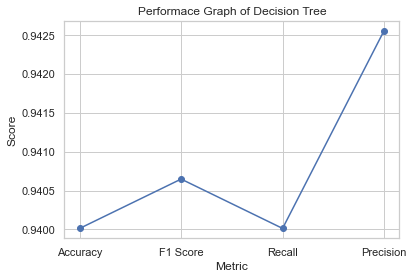

In [712]:
metric_names = ['Accuracy', 'F1 Score', 'Recall', 'Precision']
metric_scores = [Accuracy,F1_score,Recall_score, Precision_score]

# Create a bar graph
plt.plot(metric_names, metric_scores , marker = 'o')

# Set the title and axis labels
plt.title('Performace Graph of Decision Tree')
plt.xlabel('Metric')
plt.ylabel('Score')

# Display the graph
plt.show()

# K-Nearest Neighbour (KNN)

In [713]:
X = df[features]  # features / attributes
y = df['target_label']   # target label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)   # splitting on data 70/30 ratio

In [714]:
KNN = KNeighborsClassifier(n_neighbors=5)

In [715]:
KNN.fit(X_train , y_train)

KNeighborsClassifier()

In [716]:
knn_prediction = KNN.predict(X_test)

In [717]:
accuracy = accuracy_score(y_test, knn_prediction)
print("Accuracy:", accuracy)

Accuracy: 0.9671094411515665


## Searching for optimal value

In [718]:
accuracies = []
k_values = []
for i in range(1,11):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train , y_train)
    knn_prediction = KNN.predict(X_test)
    

    #Accuracy
    accuracy = accuracy_score(y_test, knn_prediction)
    accuracies.append(accuracy)
    k_values.append(i)
    print("Accuracy at k = ",i," ", accuracy)

Accuracy at k =  1   0.9730366215071973
Accuracy at k =  2   0.968088484335309
Accuracy at k =  3   0.9698613463166808
Accuracy at k =  4   0.9684060118543607
Accuracy at k =  5   0.9671094411515665
Accuracy at k =  6   0.9658657917019475
Accuracy at k =  7   0.9642516934801016
Accuracy at k =  8   0.9634314140558848
Accuracy at k =  9   0.9631403471634208
Accuracy at k =  10   0.9624259102455546


Text(0.5, 1.0, 'Accuracy vs. k Value')

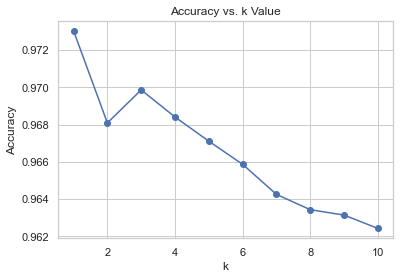

In [719]:
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k Value')


In [720]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train , y_train)
knn_prediction = KNN.predict(X_test)

    #Accuracy
accuracy = accuracy_score(y_test, knn_prediction)
print("Accuracy at k = ",3," ", accuracy)

Accuracy at k =  3   0.9698613463166808


Note:Setting k to 1 can result in overfitting to the training data and make the model more susceptible to noise and outliers in the data. Increasing the value of k can improve the generalization ability of the model, but it may also result in a higher bias and lower model complexity

## Metrics Scores (KNN)

In [721]:
Accuracy = accuracy_score(y_test, knn_prediction)
F1_score = f1_score(y_test, knn_prediction,average = 'weighted')
Recall_score = recall_score(y_test, knn_prediction,average = 'weighted')
Precision_score = precision_score(y_test, knn_prediction, average = 'weighted')

print("Accuracy score: ", Accuracy )
print("F1 score: ",F1_score)
print("Recall Score: ",Recall_score)
print("Precision score: ",Precision_score)

Accuracy score:  0.9698613463166808
F1 score:  0.9697187634971518
Recall Score:  0.9698613463166808
Precision score:  0.9697594826259062


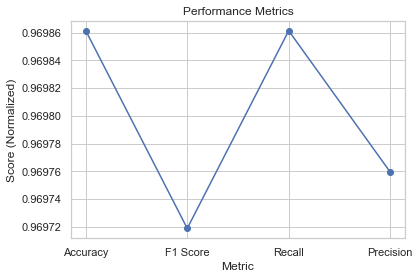

In [722]:
metric_names = ['Accuracy', 'F1 Score', 'Recall', 'Precision']
metric_scores = [Accuracy,F1_score,Recall_score, Precision_score]

plt.plot(metric_names, metric_scores , marker = 'o')

# Set the title and axis labels
plt.title('Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Score (Normalized)')



# Display the graph
plt.show()


# ANN (Multilayer Perceptron)

In [723]:
X = df[features]  # features / attributes
y = df['target_label']   # target label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)   # splitting on data 70/30 ratio

In [724]:
Multilayer_perceptron = MLPClassifier(solver='lbfgs' ,alpha = 1e-5, hidden_layer_sizes = (5,3,3) , random_state = 10)

In [725]:
Multilayer_perceptron.fit(X_train , y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 3, 3), random_state=10,
              solver='lbfgs')

In [726]:
mlp_prediction =  Multilayer_perceptron.predict(X_test)

## Metric Scores(MLP Classifier)

In [727]:
Accuracy = accuracy_score(y_test, mlp_prediction)
F1_score = f1_score(y_test, mlp_prediction,average = 'weighted')
Recall_score = recall_score(y_test, mlp_prediction,average = 'weighted')
Precision_score = precision_score(y_test, mlp_prediction, average = 'weighted')

print("Accuracy score: ", Accuracy )
print("F1 score: ",F1_score)
print("Recall Score: ",Recall_score)
print("Precision score: ",Precision_score)

Accuracy score:  0.9154847586790855
F1 score:  0.9120403925019586
Recall Score:  0.9154847586790855
Precision score:  0.9116028961209518


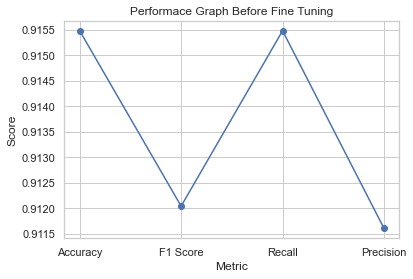

In [728]:
metric_names = ['Accuracy', 'F1 Score', 'Recall', 'Precision']
metric_scores = [Accuracy,F1_score,Recall_score, Precision_score]

# Create a bar graph
plt.plot(metric_names, metric_scores , marker = 'o')

# Set the title and axis labels
plt.title('Performace Graph Before Fine Tuning')
plt.xlabel('Metric')
plt.ylabel('Score')

# Display the graph
plt.show()

# Fine Tuning

In [729]:
Multilayer_perceptron = MLPClassifier(solver='adam' ,alpha = 1e-5, hidden_layer_sizes = (4,4,6) , random_state = 1)

In [730]:
Multilayer_perceptron.fit(X_train , y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(4, 4, 6), random_state=1)

In [731]:
mlp_prediction =  Multilayer_perceptron.predict(X_test)

## Metric Scores(After Tuning)

In [732]:
Accuracy = accuracy_score(y_test, mlp_prediction)
F1_score = f1_score(y_test, mlp_prediction,average = 'weighted')
Recall_score = recall_score(y_test, mlp_prediction,average = 'weighted')
Precision_score = precision_score(y_test, mlp_prediction, average = 'weighted')

print("Accuracy score: ", Accuracy )
print("F1 score: ",F1_score)
print("Recall Score: ",Recall_score)
print("Precision score: ",Precision_score)

Accuracy score:  0.9583245131244708
F1 score:  0.9581890827029542
Recall Score:  0.9583245131244708
Precision score:  0.9580755478271874


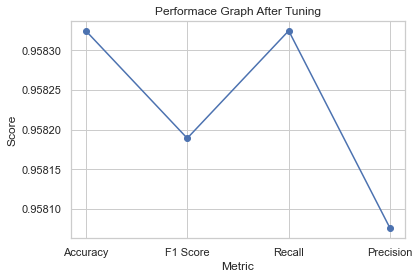

In [733]:
metric_names = ['Accuracy', 'F1 Score', 'Recall', 'Precision']
metric_scores = [Accuracy,F1_score,Recall_score, Precision_score]

# Create a bar graph
plt.plot(metric_names, metric_scores , marker = 'o')

# Set the title and axis labels
plt.title('Performace Graph After Tuning')
plt.xlabel('Metric')
plt.ylabel('Score')

# Display the graph
plt.show()





## K-Means Clustering

In [734]:
df1 = df.drop(columns='target_label') # dropping the target label

In [735]:
df1

,flag,logged_in,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,occurance
0,-0.606907,0,25,0.17,0.03,0.17,0.216426
1,-0.606907,0,1,0.00,0.60,0.88,-1.965556
2,0.368519,0,26,0.10,0.05,0.00,-0.219970
3,-0.606907,1,255,1.00,0.00,0.03,0.652823
4,-0.606907,1,255,1.00,0.00,0.00,0.652823
...,...,...,...,...,...,...,...
125968,0.368519,0,25,0.10,0.06,0.00,0.216426
125969,-0.606907,0,244,0.96,0.01,0.01,0.652823
125970,-0.606907,1,30,0.12,0.06,0.00,-0.656367
125971,0.368519,0,8,0.03,0.05,0.00,0.216426


In [736]:
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state = 10)
    kmeans.fit(df1)
    sse.append(kmeans.inertia_)

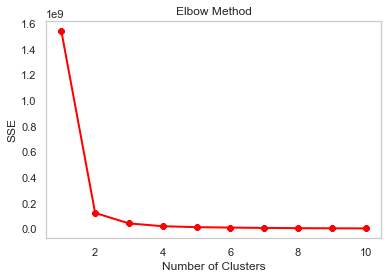

In [737]:
number_of_clusters = range(1,11)
plt.grid()
plt.plot(number_of_clusters , sse , linewidth = 2 , color = 'red' , marker = "8")
plt.title('Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

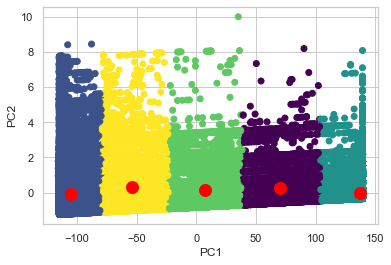

In [738]:


pca = PCA(n_components=2)
X_pca = pca.fit_transform(df1)  # Perform PCA to reduce the number of dimensions to 2


kmeans = KMeans(n_clusters=5 , init='k-means++', random_state=10)
kmeans.fit(X_pca)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_    # Perform K-means clustering

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Add cluster centroids to the plot
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=100, linewidths=3, color='red', zorder=10)

plt.show()


